## ML_HW1 (весна 2019)
#### Команда pygirls  представляет вашему вниманию стильное (возможно, не очень), модное (более вероятно), молодёжное (а вот это похоже на правду) решение ML_HW1!

#### Состав команды:
- Давыдова Вера
- Кравцова Анастасия
- Решетникова Арина

# Данные

In [2]:
 !wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv


--2019-03-04 20:24:28--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [following]
--2019-03-04 20:24:28--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4f9bfb1c342c3e972240f70d1.dl.dropboxusercontent.com/cd/0/inline/AcfCUtOhNQXUEz6qhi7m2JXDiK5prOau2aPZv6h2MVrNXVYl9rEgwX5V-XNiK7-hIcEHeNlg8avUvAGH9Pf7Fs_-ghu88p3U48AOSzlM6djauGY0qKKzE06ZwM06wlZOyzk/file# [following]
--2019-03-04 20:24:28--  https://ucd4f9bfb1c342c3e972240f70d1.dl.dropboxusercontent.com/cd/0/inline/AcfCUtOhNQXUEz6qhi7m2JXDiK5prOau2aPZv6h2MVrNXVYl9rEgwX5V-XNiK7-hIcEHeNlg8av

In [3]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', encoding = 'utf-8', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


In [4]:
df = df.dropna()
df.shape

(11526, 2)

# Домашнее задание 1 

В этом домашнем задании вы будете решать задачу тематической классификации. Даны тексты, опубликованные в нескольких пабликах VK.com, посвященных государственным и муниципальным службам. Формально задача заключается в том, чтобы по тексту ($d$) определить в каком паблике он опубликован, то есть, к какому классу $c$ он принадлежит. 

## Задание 1 [2 балла]. Описательные статистики
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [0]:
import pymorphy2
from string import punctuation
from collections import Counter

punct = punctuation+' «»—…“”*№–<>br'
morph = pymorphy2.MorphAnalyzer()

In [0]:
num_txts = df.shape[0]      # количество текстов
num_class = len(set(df.source))     # количество классов

In [0]:
def split_txt(text):
    txt = []
    for word in text.split(' '):
            word = word.strip(punct).lower().replace('<br>', '')  # проверить норм ли работает
            if word:
                txt.append(word)
    return txt


def len_txt(text):
    return(len(text))

def lemmatize(text):
    words = [morph.parse(word)[0].normal_form for word in text]
    return words

In [0]:
df['spl_txt'] = df['text'].apply(split_txt)    # тексты без пунктуации
df['len_words'] = df['spl_txt'].apply(len_txt)   # длина текста в словах
df['len_symbols'] = df['text'].apply(len_txt)    # длина текста в символах
df['lemmas'] = df['spl_txt'].apply(lemmatize)  # лемматизированный текст

In [0]:
def get_all_lemmas(text):
    all_lemmas = []
    for txt in text:
        all_lemmas.extend(txt)
    return all_lemmas

unique_lemmas = len(set(get_all_lemmas(df['lemmas'])))    # число уникальных лемм в корпусе

In [0]:
len_corpus_w = sum(df.len_words)       # длина корпуса в словах
mean_len_words = df.len_words.mean()   # средняя длина текста в словах
mean_len_symbols = df.len_symbols.mean() # средняя длина текста в символах

In [0]:
def get_freq_n(text):
    nouns = []
    for word in text:
        if 'NOUN' in morph.parse(word)[0].tag:
            nouns.append(word)   
    return [i[0] for i in Counter(nouns).most_common(5)]

In [0]:
grouped = df.groupby(['source'])
names = []

for name, group in grouped:
    names.append(name)
    if name == 'mil':
        mil = group['lemmas']
    elif name == 'mchsgov':
        mchsgov = group['lemmas']
    elif name == 'mospolice':
        mospolice = group['lemmas']
    elif name == 'russianpost':
        russianpost = group['lemmas']

mil = get_all_lemmas(mil)
mchs = get_all_lemmas(mchsgov)
police = get_all_lemmas(mospolice)
post = get_all_lemmas(russianpost)

In [0]:
nouns_mil = get_freq_n(mil)
nouns_mchs = get_freq_n(mchs)
nouns_police = get_freq_n(police)
nouns_post = get_freq_n(post)

In [0]:
all_nouns = [nouns_mil, nouns_mchs, nouns_police, nouns_post]

In [0]:
nouns = pd.DataFrame({'source': [n for n in names]})

nouns['source'] = names
nouns['frequent nouns'] = all_nouns

In [0]:
df.head()

,text,source,spl_txt,len_words,len_symbols,lemmas
0,Начальник Главного оперативного управления Ген...,mil,"[начальник, главного, оперативного, управления...",1611,13306,"[начальник, главный, оперативный, управление, ..."
1,Артиллерийские подразделения общевойскового об...,mil,"[артиллерийские, подразделения, общевойскового...",87,759,"[артиллерийский, подразделение, общевойсковой,..."
2,Подразделения морской пехоты Каспийской флотил...,mil,"[подразделения, морской, пехоты, каспийской, ф...",49,499,"[подразделение, морской, пехота, каспийский, ф..."
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[команды, на, всеармейских, этапах, конкурсов,...",126,1091,"[команда, на, всеармейский, этап, конкурс, арм..."
4,На большом учебно-методическом командирском сб...,mil,"[на, большом, учебно-методическом, командирско...",78,719,"[на, большой, учебно-методический, командирски..."


### Итог

In [0]:
print('количество текстов: ' + str(num_txts))
print('количество классов: ' + str(num_class))
print('количество слов (без лемматизации): ' + str(len_corpus_w))
print('количество лемм: ' + str(unique_lemmas))
print('средняя длина текста в словах: ' + str(mean_len_words))
print('средняя длина текста в символах: ' + str(mean_len_symbols))
print('топ-5 существительных для каждого класса:')
nouns

количество текстов: 11526
количество классов: 4
количество слов (без лемматизации): 960797
количество лемм: 48257
средняя длина текста в словах: 83.35910116258893
средняя длина текста в символах: 690.7630574353635
топ-5 существительных для каждого класса:


,source,frequent nouns
0,mchsgov,"[военный, минобороны, россия, год, оборона]"
1,mil,"[мчс, россия, мчсроссия, спасатель, год]"
2,mospolice,"[полиция, год, москва, мвд, россия]"
3,russianpost,"[почта, россия, год, отделение, письмо]"


Разделите коллекцию текстов на обучающую и тестовую части. 

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df)

cleared_text = [' '.join(text) for text in df['spl_txt']]
X_train, X_test, y_train, y_test = train_test_split(cleared_text, df['source'], test_size=0.2, random_state=42)

 ## Задание 2 [2 балла]. Классификация по правилам
 
 * Разработайте несколько правил вида "Если встречается слово $w$, то текст относится к паблику $c$"
 * Посчитайте, какую точность, полноту, $f$-меру и $accuracy$ вы получаете при классификации по правилам
 * Получилось ли у вас придумать правило, которое никогда не ошибается?

Для начала попробуем определять источник по самым частотным леммам текста. Леммы "россия" и "год" являются самыми частотными для всех 4 ресурсов, поэтому их использовать не будем. Если искомой леммы в тексте нет, то присвоим ресурс рандомно.

In [0]:
import random

def predict_source_by_rule_1(text):
    if ('мчс', 'спасатель', 'мчсроссия') in text:
        return 'mchsgov'
    if ('минобороны' or 'оборона' or 'военный') in text:
        return 'mil'
    if ('почта' or 'отделение' or 'письмо') in text: 
        return 'russianpost'
    if ('мвд' or 'полиция' or 'москва') in text:
        return 'mospolice'
    else:
        return random.choice(['mil', 'russianpost', 'mospolice', 'mchsgov'])

In [0]:
df['predicted_source'] = df['lemmas'].apply(predict_source_by_rule_1) 
    
df.head()

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,source,spl_txt,len_words,len_symbols,lemmas,predicted_source
11225,"650 тысячным мигрантом, получившим патент, ста...",mospolice,"[650, тысячным, мигрантом, получившим, патент,...",151,1285,"[650, тысячная, мигрант, получить, патент, ста...",mchsgov
11405,«По распоряжению начальника ГУ МВД России по г...,mospolice,"[по, распоряжению, начальника, гу, мвд, россии...",41,368,"[по, распоряжение, начальник, гу, мвд, россия,...",mospolice
7042,#ПочтаРоссии #ЦифраДня,russianpost,"[почтароссии, цифрадня]",2,22,"[почтароссия, цифрадень]",russianpost
7349,Почтовое отправление может быть выслано на адр...,russianpost,"[почтовое, отправление, может, быть, выслано, ...",84,703,"[почтовый, отправление, мочь, быть, выслать, н...",russianpost
5513,Глава МЧС России Владимир Пучков проконтролиро...,mchsgov,"[глава, мчс, россии, владимир, пучков, проконт...",33,341,"[глава, мчс, россия, владимир, пучок, проконтр...",mospolice


Видно, что некоторые источники определились верно. Оценим, насколько.

In [0]:
from sklearn.metrics import *

def evaluate(true, predicted):
    precision = precision_score(true, predicted, average = 'macro')
    recall = recall_score(true, predicted, average = 'macro')
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted, average = 'macro')
  
    return print(' precision:', precision, '\n', 'recall:', recall, '\n', 'accuracy:', accuracy, '\n', 'f1:', f1)

In [0]:
evaluate(df['source'], df['predicted_source'])

 precision: 0.5219518768262141 
 recall: 0.5420303012122075 
 accuracy: 0.5356585111920874 
 f1: 0.5209115628691484


F-мера ~0.524 не так уж и много. Заметим, что админы пабликов не ленятся ставить хэштеги к своим постам. Возможно, у нас получится определить источник текста по хэштегу?

In [0]:
def predict_source_by_rule_2(text):
    if ('МЧС') in text:
        return 'mchsgov'
    if ('Минобороны') in text:
        return 'mil'
    if ('ПочтаРоссии') in text: 
        return 'russianpost'
    if ('МВД') in text:
        return 'mospolice'
    else:
        return random.choice(['mil', 'russianpost', 'mospolice', 'mchsgov'])

In [0]:
df['predicted_source'] = df['text'].apply(predict_source_by_rule_2)

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
evaluate(df['source'], df['predicted_source'])

 precision: 0.775225660017259 
 recall: 0.7712479102482912 
 accuracy: 0.7770258545896235 
 f1: 0.7638611585958146


Оказывается, простые хэштеги работают лучше, чем леммы: метрики увеличились почти на 0,25. Попробуем добавить ещё слов.

In [0]:
import re

def predict_source_by_rule_3(text):
    for i in re.findall(r'[сС]пасат.*', text):
        if i in text:
            return 'mchsgov'
    for i in re.findall(r'(мчс|МЧС).*', text):
        if i in text:
            return 'mchsgov'
    for i in re.findall(r'[мМ]иноборон.*', text):
        if i in text:
            return 'mil'
    for i in re.findall(r'.*Победы', text):
        if i in text:
            return 'mil'
    for i in re.findall(r'[пП]очт.*', text):
        if i in text: 
            return 'russianpost'
    if ('МВД') in text:
        return 'mospolice'
    else:
        return random.choice(['mil', 'russianpost', 'mospolice', 'mchsgov'])

In [0]:
df['predicted_source'] = df['text'].apply(predict_source_by_rule_3) 
df.head()

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,source,spl_txt,len_words,len_symbols,lemmas,predicted_source
11225,"650 тысячным мигрантом, получившим патент, ста...",mospolice,"[650, тысячным, мигрантом, получившим, патент,...",151,1285,"[650, тысячная, мигрант, получить, патент, ста...",mospolice
11405,«По распоряжению начальника ГУ МВД России по г...,mospolice,"[по, распоряжению, начальника, гу, мвд, россии...",41,368,"[по, распоряжение, начальник, гу, мвд, россия,...",mospolice
7042,#ПочтаРоссии #ЦифраДня,russianpost,"[почтароссии, цифрадня]",2,22,"[почтароссия, цифрадень]",russianpost
7349,Почтовое отправление может быть выслано на адр...,russianpost,"[почтовое, отправление, может, быть, выслано, ...",84,703,"[почтовый, отправление, мочь, быть, выслать, н...",russianpost
5513,Глава МЧС России Владимир Пучков проконтролиро...,mchsgov,"[глава, мчс, россии, владимир, пучков, проконт...",33,341,"[глава, мчс, россия, владимир, пучок, проконтр...",mchsgov


In [0]:
evaluate(df['source'], df['predicted_source'])

 precision: 0.8497542721192493 
 recall: 0.8501231872993915 
 accuracy: 0.8486031580773903 
 f1: 0.8462722864051775


Правила показали неплохие результаты: f1 ~ 85 на несложных if-ах.

Написать правило, которое давало бы все 100% не получилось, и представляется маловозможным, потому что слова могут пересекаться в разных источниках. 
Попробуем решить нашу задачу более модно-молодёжными подходами :)

## Задание 3 [4 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
from sklearn.feature_extraction.text import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

In [0]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.99      0.97      0.98       613
        mil       0.98      0.99      0.99       614
  mospolice       0.97      0.99      0.98       545
russianpost       0.97      0.97      0.97       534

avg / total       0.98      0.98      0.98      2306



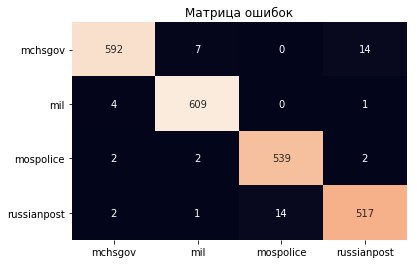

In [0]:
# Матрица ошибок
import matplotlib.pyplot as plt
import seaborn as sns

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Можно увидеть, что классификатор чаще всего совершает следующие ошибки:
- относит тексты russianpost к mchsgov (14 ошибок)
- относит тексты mospolice к russianpost (14 ошибок)

## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [0]:
from sklearn.decomposition import TruncatedSVD

clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('reduce', TruncatedSVD(n_components=100, random_state=42)),
    ('clf', SGDClassifier())
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

             precision    recall  f1-score   support

    mchsgov       0.99      0.93      0.96       613
        mil       0.97      0.98      0.97       614
  mospolice       0.97      0.99      0.98       545
russianpost       0.94      0.96      0.95       534

avg / total       0.97      0.97      0.97      2306



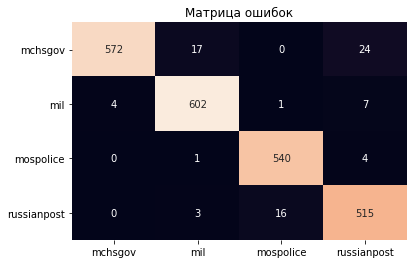

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Классификатор снова относит тексты russianpost к mchsgov (24 ошибки), а тексты mospolice к russianpost (16 ошибок).
При этом заметна еще одна неточность: тексты mil стали чаще по ошибке попадать в mchsgov (17 ошибок).

Качество классификации после снижения размерности осталось примерно на том же уровне, что было до снижения.
Нам в какой-то степени повезло, поскольку SGD-классификатор умеет работать с отрицательными значениями, которые (чисто теоретически) могли появиться в результате разложения.

Если бы изначально мы взяли наивный Байесовский классификатор, то он выдает ошибку, связанную с наличием отрицательных значений ValueError: Input X must be non-negative

## Задание 5 [2 балла]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

In [0]:
df = shuffle(df)
lemmatized_text = [' '.join(text) for text in df['lemmas']]
X_train, X_test, y_train, y_test = train_test_split(lemmatized_text, df['source'], test_size=0.2, random_state=42)

In [0]:
# Проверим на словах
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

             precision    recall  f1-score   support

    mchsgov       0.99      0.97      0.98       616
        mil       0.99      0.99      0.99       606
  mospolice       0.97      0.99      0.98       553
russianpost       0.97      0.97      0.97       531

avg / total       0.98      0.98      0.98      2306



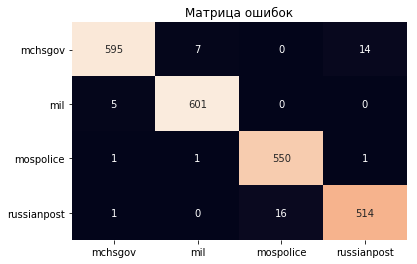

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Качество классификации повысилось на (целый) процент!
При этом удалось понизить попадание текстов mil в mchsgov (7 ошибок вместо 17) и текстов russianpost в mchsgov (14 ошибок вместо 24).

In [0]:
# А теперь добавим энграммы и проверим на них
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,4))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

             precision    recall  f1-score   support

    mchsgov       0.99      0.96      0.97       616
        mil       0.99      0.99      0.99       606
  mospolice       0.98      1.00      0.99       553
russianpost       0.96      0.97      0.96       531

avg / total       0.98      0.98      0.98      2306



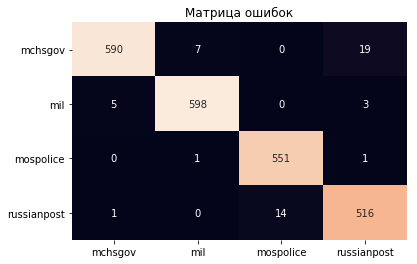

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Лемматизация на энграммах также повысила качество работы классификатора на 1%

Однако кажется, что по факту тут нет значимого прироста, поскольку играет роль случайность запуска: по факту эмпирическим путем многократных запусков тетрадки качество чаще всего получалось идентичным подходу без лемматизации.

## Задание 6 [4 балла]. Модель скрытых тем
Постройте и визуализируйте модель скрытых тем (LSI или LDA) по данной коллекции текстов.

Нужно ли здесь использовать разделение на тестовую и обучающую части? - В принципе нет: модель можно построить и по всей коллекции, но нам не хватало вычислительных ресурсов, поэтому мы случайным образом взяли 60% датасета.

Как модель скрытых тем может помочь в решении задачи классификации? -- Может помочь снизить размерность пространства признаков.

Удалим из датасета стоп-слова и слова с частотностью 1

In [0]:
from nltk.corpus import stopwords
stops = stopwords.words('russian')

def del_stops(text):
    t = [word for word in text if word not in stops]
    return t

def del_low_frequencies(text):
    res = []
    for pair in Counter(text).most_common():
        if pair[1] > 1:
            res.append(pair[0])
    return res

In [0]:
df['text_wo_stops'] = df['lemmas'].apply(del_stops)

In [0]:
df['text_wo_stops_f'] = df['text_wo_stops'].apply(del_low_frequencies)

In [0]:
from gensim import corpora, similarities
from gensim.models import *

Для этой задачи не нужно делить на обучающую и тестовую выборки, но мы возьмём 60% текстов, потому что, как оказалось, процесс визуализации в какой-то момент падает, если мы берём весь датасет полностью.

In [0]:
df_part = df.sample(frac=0.6)
df_part = df_part.sort_values(['source'])

In [0]:
texts = [df_part['text_wo_stops'].iloc[i] for i in range(len(df_part))]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

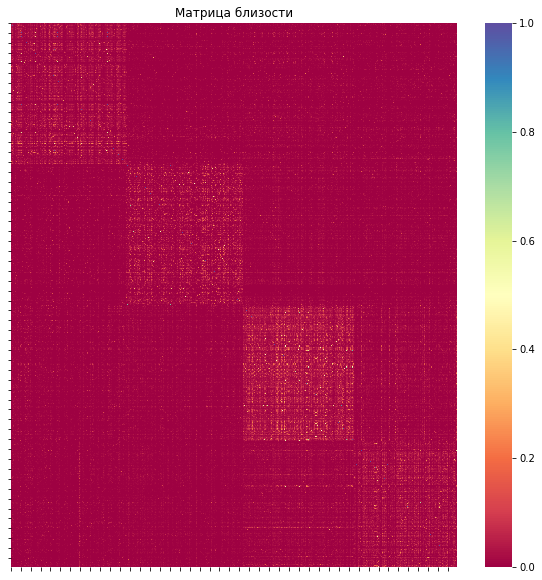

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

Видны проблески 4-х тем!

In [0]:
%%time
lsi = LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4)
print(lsi)

LsiModel(num_terms=35682, num_topics=4, decay=1.0, chunksize=20000)
Wall time: 3.55 s


In [0]:
lsi.show_topics()

[(0,
  '-0.234*"полиция" + -0.229*"мвд" + -0.186*"москва" + -0.172*"год" + -0.148*"гу" + -0.148*"задержать" + -0.145*"россия" + -0.137*"петровка38" + -0.136*"сотрудник" + -0.131*"мчс"'),
 (1,
  '0.543*"мчс" + 0.530*"мчсроссия" + 0.210*"безопасностьэтый" + 0.186*"советмчс" + 0.171*"беречь" + 0.163*"следовать" + 0.147*"безопасность" + 0.142*"правило" + 0.133*"фактмчс" + -0.119*"полиция"'),
 (2,
  '-0.213*"мчсроссия" + 0.164*"почтовый" + -0.163*"мвд" + -0.162*"мчс" + -0.153*"полиция" + 0.147*"почта" + -0.138*"задержать" + -0.123*"петровка38" + -0.120*"подозревать" + 0.119*"открытка"'),
 (3,
  '-0.239*"задержать" + 0.230*"хороший" + 0.227*"утро" + 0.216*"успешный" + 0.210*"добрый" + 0.208*"понедельник" + -0.198*"подозревать" + 0.195*"фото" + 0.194*"рабочий" + 0.180*"неделя"')]

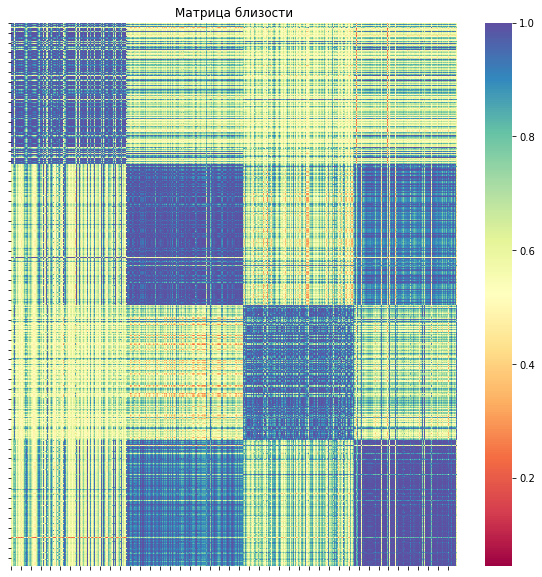

In [0]:
corpus_lsi = lsi[corpus]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[corpus_lsi]
sims = (sims + 1)/2
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

По show_topics видно, что более-менее четко выделилась одна тема (1), связанная с МЧС.
Также есть подозрение, что тема (3) связана с почтой (методом исключения -- там не встретилось ни милиции, ни мчс, ни мвд).
Оставшиеся темы -- что-то не очень понятное, всё в куче. Возможно, это как раз потому, что нам пришлось взять только часть датасета.

Как видим из картинки, в текстах темы пересекаются из-за похожей лексики. Ещё в задании 1 мы увидели, что самые частотные существительные тоже повторяются (во всех категориях есть "россия" и "год", например), так что результат неудивительный.


Делаем вывод, что тематическое моделирование для классификации нам не очень поможет :(

## Задание 7 [4 балла]. Continious bag of words
Для baseline решения мы использовали обычное представление текста в виде мешка слов. Попробуйте использовать другие модели представления текста – например, в виде непрерывного мешка слов, то есть, в виде набора эмбеддингов. Для того, чтобы получить вектор текста попробуйте:
* усреднить все эмбеддинги слов, входящих в этот текст
* усреднить все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами
* использовать любую модель эмбеддинга документа.

Используйте любую модель эмбеддингов по вашему вкусу. 


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
import numpy as np

In [0]:
# Попробуем усреднить вектора для слов, содержащихся в тексте -- тем самым получим вектор для текста
# Для получения векторов применим word2vec к не-лемматизированным текстам, предварительно их перемешав для чистоты эксперимента

df = shuffle(df)

w2v = gensim.models.Word2Vec([text for text in df.spl_txt], size=50)

In [0]:
def get_embedding(text, model, dim):
    
    # чтобы не доставать одно слово несколько раз
    # сделаем счетчик, а потом векторы домножим на частоту
    words = Counter(text)
    total = len(text)
    vectors = np.zeros((len(words), dim))
    
    for i,word in enumerate(words):
        try:
            v = model[word]
            vectors[i] = v*(words[word]/total) # просто умножаем вектор на частоту
        except (KeyError, ValueError):
            continue
    
    if vectors.any():
        vector = np.average(vectors, axis=0)
    else:
        vector = np.zeros((dim))
    
    return vector

In [0]:
dim=50
X_text_w2v = np.zeros((len(df.spl_txt), dim))

for i, text in enumerate(df.spl_txt):
    X_text_w2v[i] = get_embedding(text, w2v, dim)

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_text_w2v, df['source'], test_size=0.2)

clf = SGDClassifier()

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

             precision    recall  f1-score   support

    mchsgov       0.97      0.74      0.84       591
        mil       0.94      0.80      0.86       613
  mospolice       0.61      0.99      0.75       584
russianpost       0.90      0.65      0.75       518

avg / total       0.85      0.80      0.80      2306



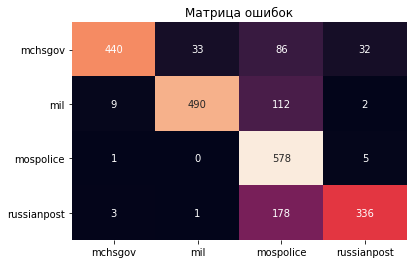

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

# Матрица ошибок
labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Удивительно, но ошибок с применением векторной модели стало в разы больше по сравнению с бейзлайном.

А если попробовать эмбеддинги к лемматизированным текстам?

In [0]:
df = shuffle(df)

w2v = gensim.models.Word2Vec([text for text in df.lemmas], size=50)

In [0]:
dim = 50
X_text_w2v = np.zeros((len(df.lemmas), dim))

for i, text in enumerate(df.lemmas):
    X_text_w2v[i] = get_embedding(text, w2v, dim)

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_text_w2v, df['source'], test_size=0.2, random_state=42)

clf = SGDClassifier()

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

             precision    recall  f1-score   support

    mchsgov       0.98      0.78      0.87       638
        mil       0.86      0.98      0.92       599
  mospolice       0.90      0.98      0.94       562
russianpost       0.89      0.89      0.89       507

avg / total       0.91      0.90      0.90      2306



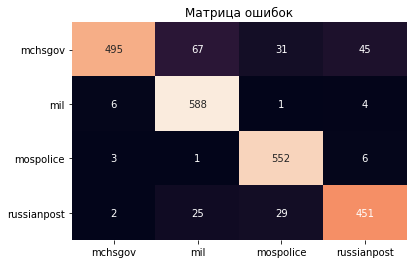

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

# Матрица ошибок
labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Применение w2v на лемматизированных текстах повысило качество классификации на целых 10%
Однако, как ни парадоксально, метрики у непрерывного мешка слов по-прежнему ниже, чем у бейзлайна с мешком слов.

## Задание 8 [2 балла]. fastText

Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
# Применим FastText к не-лемматизированным текстам, предварительно их перемешав для чистоты эксперимента
df = shuffle(df)

fast_text = gensim.models.FastText([text for text in df.spl_txt], size=50, min_n=2, max_n=6)

In [0]:
dim = 50
X_text_fast_text = np.zeros((len(df.spl_txt), dim))

for i, text in enumerate(df.spl_txt):
    X_text_fast_text[i] = get_embedding(text, fast_text, dim)

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_text_fast_text, df['source'], test_size=0.2, random_state=42)

clf = SGDClassifier()

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

             precision    recall  f1-score   support

    mchsgov       0.97      0.77      0.86       593
        mil       0.97      0.76      0.85       631
  mospolice       0.96      0.73      0.83       580
russianpost       0.54      0.96      0.69       502

avg / total       0.87      0.80      0.81      2306



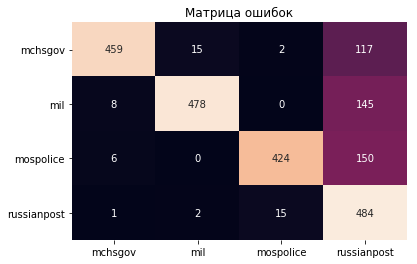

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Результат на процент выше, чем у ворд2века без лемматизации.

In [0]:
# А теперь применим FastText к лемматизированным текстам, предварительно их перемешав для чистоты эксперимента
df = shuffle(df)

fast_text = gensim.models.FastText([text for text in df.lemmas], size=50, min_n=2, max_n=6)

In [0]:
dim = 50
X_text_fast_text = np.zeros((len(df.lemmas), dim))

for i, text in enumerate(df.lemmas):
    X_text_fast_text[i] = get_embedding(text, fast_text, dim)

C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_text_fast_text, df['source'], test_size=0.2, random_state=42)

clf = SGDClassifier()

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\a.kravtsova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

             precision    recall  f1-score   support

    mchsgov       0.98      0.87      0.92       610
        mil       0.95      0.97      0.96       630
  mospolice       0.95      0.98      0.96       552
russianpost       0.89      0.95      0.92       514

avg / total       0.94      0.94      0.94      2306



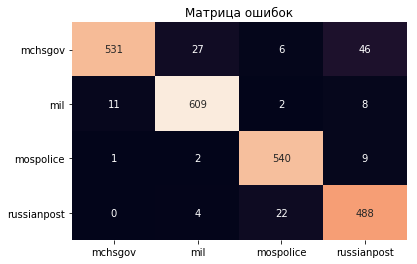

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

Применение FastText на лемматизированных текстах также повысило качество классификации, причем на целых 13% -- с 0.81 до 0.94 по f1-мере!

Теперь попробуем применить стандартный fasttext-классификатор.

Для начала приведём данные в нужный вид.

In [9]:
def add_label(row):
  row = '__label__' + row 
  return row

df['labeled_source'] = df['source'].apply(add_label) 
df.head()

,text,source,spl_txt,len_words,len_symbols,lemmas,labeled_source
0,Начальник Главного оперативного управления Ген...,mil,"[начальник, главного, оперативного, управления...",1611,13306,"[начальник, главный, оперативный, управление, ...",__label__mil
1,Артиллерийские подразделения общевойскового об...,mil,"[артиллерийские, подразделения, общевойскового...",87,759,"[артиллерийский, подразделение, общевойсковой,...",__label__mil
2,Подразделения морской пехоты Каспийской флотил...,mil,"[подразделения, морской, пехоты, каспийской, ф...",49,499,"[подразделение, морской, пехота, каспийский, ф...",__label__mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[команды, на, всеармейских, этапах, конкурсов,...",126,1091,"[команда, на, всеармейский, этап, конкурс, арм...",__label__mil
4,На большом учебно-методическом командирском сб...,mil,"[на, большом, учебно-методическом, командирско...",78,719,"[на, большой, учебно-методический, командирски...",__label__mil


In [10]:
labeled_text = df[['labeled_source', 'spl_txt']]

labeled_text.head()

,labeled_source,spl_txt
0,__label__mil,"[начальник, главного, оперативного, управления..."
1,__label__mil,"[артиллерийские, подразделения, общевойскового..."
2,__label__mil,"[подразделения, морской, пехоты, каспийской, ф..."
3,__label__mil,"[команды, на, всеармейских, этапах, конкурсов,..."
4,__label__mil,"[на, большом, учебно-методическом, командирско..."


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

ft_data = shuffle(labeled_text)
ft_data.head()
def make_str(word):
    row = ' '.join(word)
    return row
  

ft_data['text'] = ft_data['spl_txt'].apply(make_str) 
ft_data = ft_data.drop('spl_txt', axis=1)
ft_data.head()

ft_train, ft_test = train_test_split(ft_data, test_size=0.2)




ft_train = ft_train.to_csv('ft_train.txt', sep='\t', encoding = 'utf-8')
ft_test = ft_test.to_csv('ft_test.txt', sep='\t', encoding = 'utf-8')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
! git clone https://github.com/facebookresearch/fastText.git
! cd fastText
! pip install fastText
! pip install pyfasttext
import fasttext

fatal: destination path 'fastText' already exists and is not an empty directory.


In [0]:
classifier = fasttext.supervised('ft_train.txt', 'model', label_prefix='__label__')

In [14]:
result = classifier.test('ft_test.txt')
print ('P@1:', result.precision)
print ('R@1:', result.recall)
print ('Number of examples:', result.nexamples)

P@1: 0.9518647007805724
R@1: 0.9518647007805724
Number of examples: 2306


Очень хорошо, но бейзлайн не побит.

## Конец
Подведите итоги и проведите сравнение всех использованных методов. Какой из них показался вам лучше и почему?

**NB!** Задание обязательное вне зависимости от того, сколько из предыдущих пунктов вы выполнили, и дополнительных баллов не дает. 

#### Итоги
Была реализована классификация:
- на правилах
- с помощью линейного классификатора SGD на лемматизированных/нелемматизированных текстах с использованием слов/энграмм с подходом мешка слов с/без снижения размерности
- с помощью линейного классификатора SGD на лемматизированных/нелемматизированных текстах с использованием слов/энграмм с подходом непрерывного мешка слов (word2vec, fasttext)
- с помощью классификатора fasttext 

Наилучший результат был получен с помощью бейзлайн-подхода мешка слов на лемматизированных текстах. Fasttext-классификатор также дал высокий результат, при этом он применялся к не_лемматизированным текстам.  

При этом не было видно разницы между словами и энграммами.

Снижение размерности заметного прироста качества не дало.

Также в целом можно отметить, что применение непрерывных мешков слов на лемматизированных текстах даёт более высокий результат, нежели на не-лемматизированных.

# Правила сдачи 

1. Домашняя работа должна быть выполнена в ipynb-тетрадке под названием `ML_HW1.ipynb`.
2. Тетрадку можно загрузить либо на GitHub (и в таком случае лучше создать для домашек по курсу отдельный репозиторий), либо в Colab.
3. Ссылку на домашку нужно оставить [вот в этом опросе](https://goo.gl/forms/JpWWwKEZRkfy8OS02). 
4. Задание выполняется в группах 1-3 человека.
5. Все вычисления должны быть снабжены пояснениями!
6. Дедлайн – 4 марта в 23.59.

**NB!** Если вы даете ссылку на Colab, то обязательно делайте это через "Share", а не просто копируйте ее из адресной строки. 